In [9]:
import tensorflow as tf  # TensorFlow for machine learning tasks
import seaborn as sns    # Seaborn for statistical visualization
import matplotlib.pyplot as plt  # Matplotlib for plotting
from tensorflow import keras     # Keras for building neural networks
import numpy as np      # NumPy for numerical computations
import os              # OS module for interacting with the operating system
import pandas as pd    # Pandas for data manipulation and analysis
import itertools       # Itertools for creating iterators
from tensorflow.keras.utils import image_dataset_from_directory  # Utility for loading image datasets
from tensorflow.keras.layers import BatchNormalization, Dropout   # Layers for neural networks
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay  # Metrics for model evaluation
from tensorflow.keras.preprocessing import image   # Utility for image preprocessing
 

In [17]:
#Loading the data..^_^

# Define the paths to the training and validation datasets
train_data = "dataset/train"
valid_data = "dataset/valid"

# Load the training and validation dataset as an image dataset
train_gen = image_dataset_from_directory(directory=train_data, image_size=(256, 256),batch_size = 64,shuffle=True)
valid_gen = image_dataset_from_directory(directory=valid_data, image_size=(256, 256),batch_size=64,shuffle=True)

# Normalize the pixel values of images in the training and validation dataset
train_gen = train_gen.map(lambda image, label: (image / 255.0, label))
valid_gen = valid_gen.map(lambda image, label: (image / 255.0, label))

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [18]:
nums_train = {}
nums_valid = {}
diseases = os.listdir(train_data)


# Iterate over each disease in the list of diseases
for disease in diseases:
    #Count and store number of images for the current disease in the training and validation dataset 
    nums_train[disease] = len(os.listdir(train_data+'/'+disease))
    nums_valid[disease] = len(os.listdir(valid_data+'/'+disease))

# Create pandas DataFrames to display the count of images for each disease in the training and validation datasets
image_class_count_train = pd.DataFrame(nums_train.values(), index=nums_train.keys(), columns=['No. of images'])
image_class_count_valid = pd.DataFrame(nums_valid.values(), index=nums_valid.keys(), columns=['No. of images'])

Training data images count per class : 
                                                    No. of images
Apple___Apple_scab                                           2016
Apple___Black_rot                                            1987
Apple___Cedar_apple_rust                                     1760
Apple___healthy                                              2008
Blueberry___healthy                                          1816
Cherry_(including_sour)___healthy                            1826
Cherry_(including_sour)___Powdery_mildew                     1683
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot           1642
Corn_(maize)___Common_rust_                                  1907
Corn_(maize)___healthy                                       1859
Corn_(maize)___Northern_Leaf_Blight                          1908
Grape___Black_rot                                            1888
Grape___Esca_(Black_Measles)                                 1920
Grape___healthy                     

<Axes: title={'center': 'Training data images count per class'}, xlabel='Number of images', ylabel='Classes'>

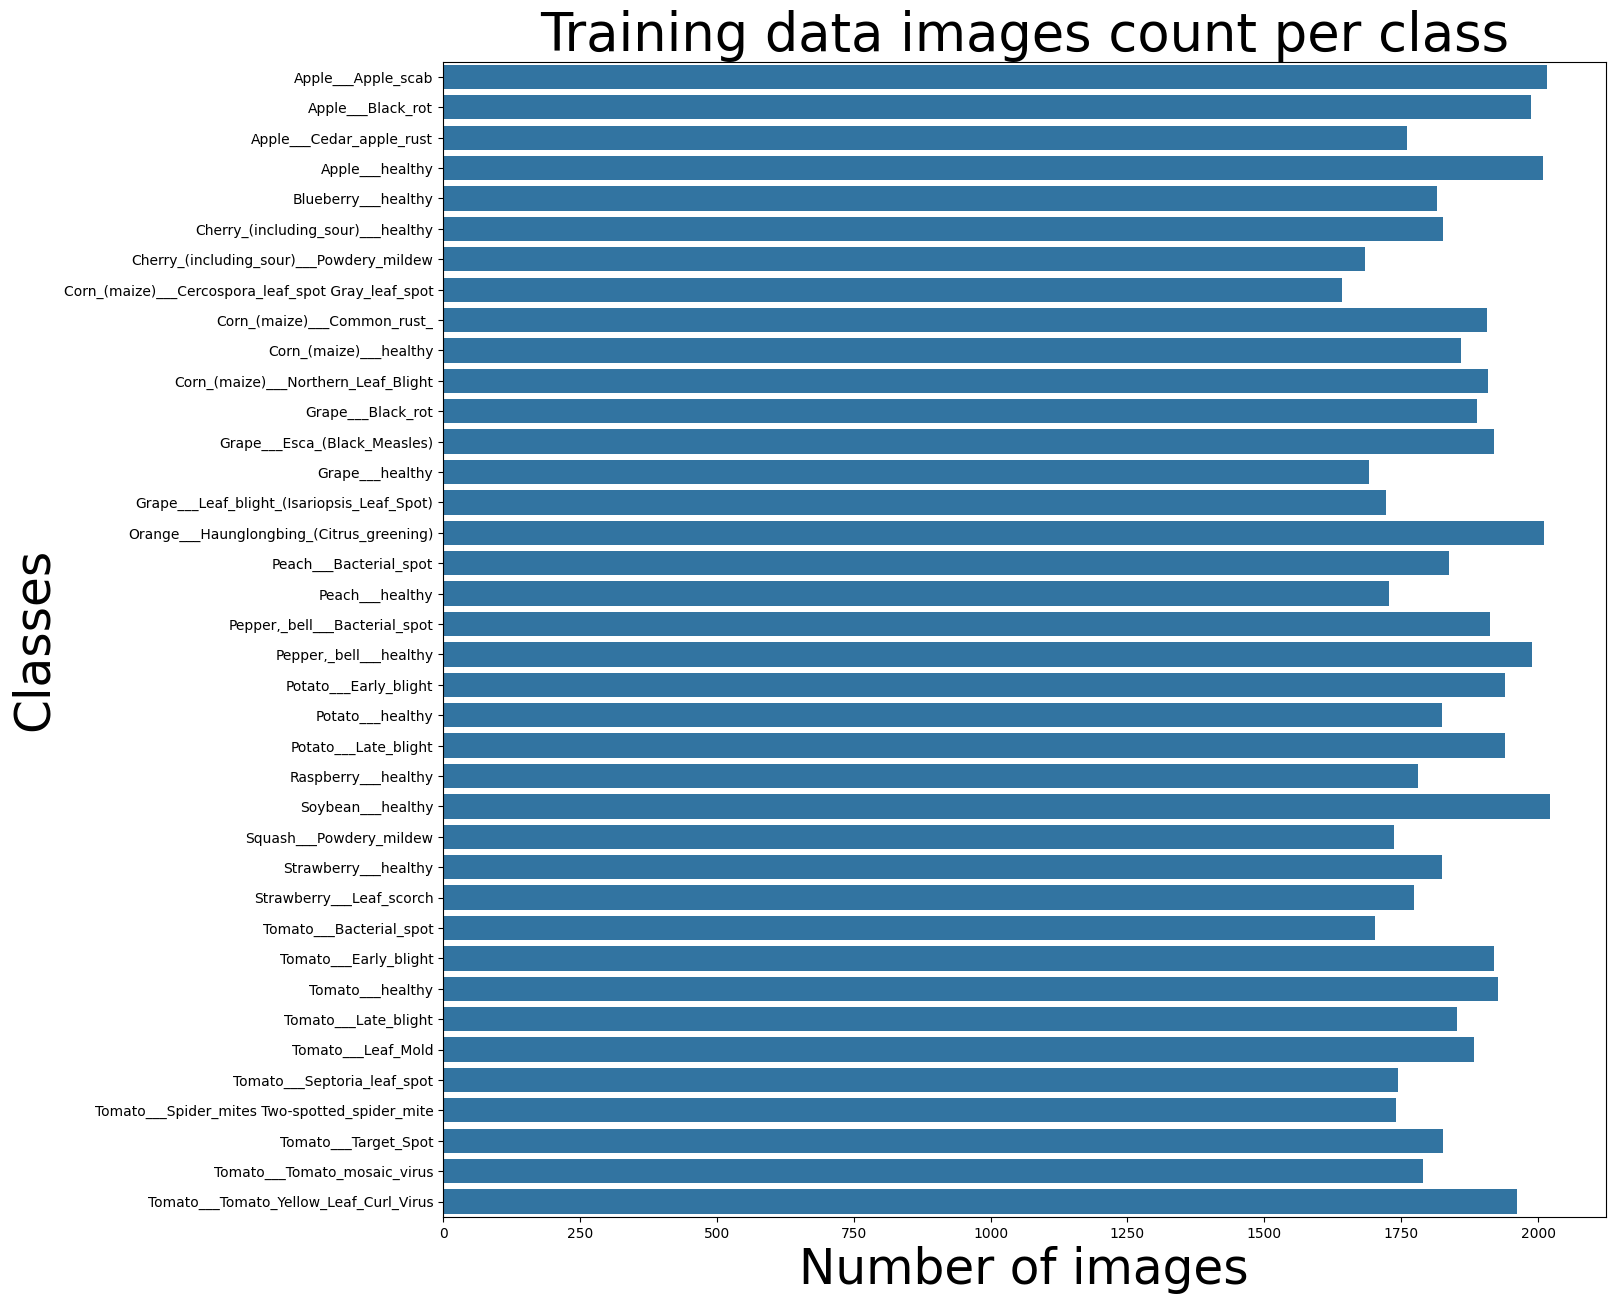

In [19]:
# Print the count of training data images per class ^_^
print('Training data images count per class : ')
print(image_class_count_train)

# Create a bar plot showing the count of training images per class
plt.figure(figsize=(15,15))
plt.title("Training data images count per class",fontsize=38)
plt.xlabel('Number of images', fontsize=35)
plt.ylabel('Classes', fontsize=35)

# Extract keys and values from the dictionary
keys = list(nums_train.keys())
vals = list(nums_train.values())

# Plot the bar plot using seaborn
sns.barplot(y=keys, x=vals)

Validation data images count per class : 
                                                    No. of images
Apple___Apple_scab                                            504
Apple___Black_rot                                             497
Apple___Cedar_apple_rust                                      440
Apple___healthy                                               502
Blueberry___healthy                                           454
Cherry_(including_sour)___healthy                             456
Cherry_(including_sour)___Powdery_mildew                      421
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot            410
Corn_(maize)___Common_rust_                                   477
Corn_(maize)___healthy                                        465
Corn_(maize)___Northern_Leaf_Blight                           477
Grape___Black_rot                                             472
Grape___Esca_(Black_Measles)                                  480
Grape___healthy                   

<Axes: title={'center': 'Validation data images count per class'}, xlabel='Number of images', ylabel='Classes'>

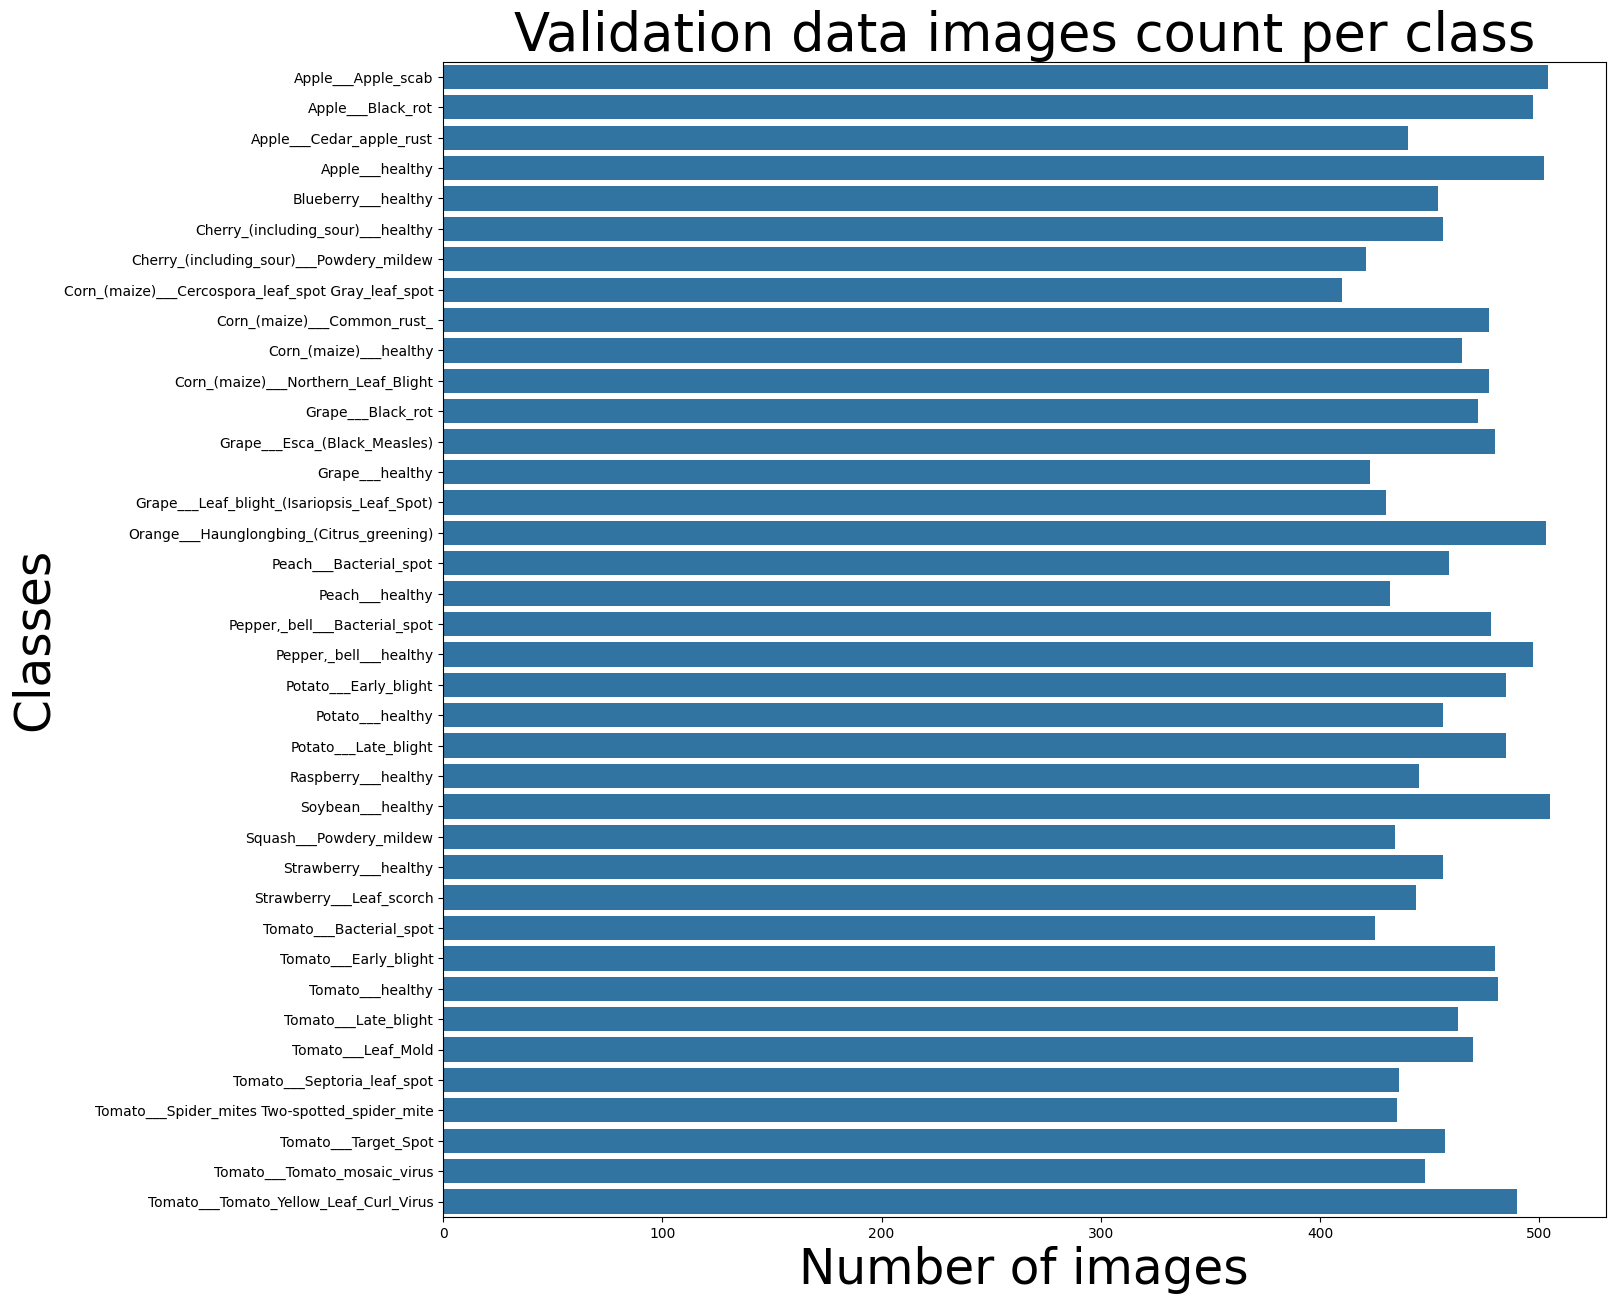

In [20]:
# Print the count of validation data images per class ^_^
print('Validation data images count per class : ')
print(image_class_count_valid)

# Create a bar plot showing the count of validation images per class
plt.figure(figsize=(15,15))
plt.title("Validation data images count per class",fontsize=38)
plt.xlabel('Number of images', fontsize=35)
plt.ylabel('Classes', fontsize=35)

# Extract keys and values from the dictionary
keys = list(nums_valid.keys())
vals = list(nums_valid.values())

# Plot the bar plot using seaborn
sns.barplot(y=keys, x=vals)

In [21]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(256,256,3)))
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))
model.add(BatchNormalization())

model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))
model.add(BatchNormalization())

# model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))
# model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))

# model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))
# model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))

model.add(keras.layers.Flatten())

# model.add(keras.layers.Dense(1568,activation="relu"))
# model.add(keras.layers.Dropout(0.5))
# model.add(BatchNormalization())
model.add(keras.layers.Dense(38,activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.summary()


C:\Users\dsmat\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 256, 256, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 85, 85, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 85, 85, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 85, 85, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 85, 85, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 9, 9, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │       394,022 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 681,670 (2.60 MB)

 Trainable params: 681,350 (2.60 MB)

 Non-trainable params: 320 (1.25 KB)

In [22]:
# base_model = tf.keras.applications.VGG16(input_shape=(256,256,3),include_top=False,weights='imagenet')
# base_model.trainable = False
# model=keras.models.Sequential()
# model.add(base_model)
# model.add(keras.layers.Flatten()) 
# model.add(keras.layers.Dense(256,activation=tf.nn.relu))
# model.add(keras.layers.Dropout(.3))
# model.add(keras.layers.Dense(38,activation=tf.nn.softmax))
# model.compile(optimizer ='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.summary()

In [23]:
# Train the model on the training data and validate it on the validation data ^_^
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor, can also be 'val_accuracy'
    patience=3,  # Number of epochs to wait for improvement
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored metric
)
# checkpoint_cb = ModelCheckpoint("ASL_model.h5", save_best_only=True)


history = model.fit(
    train_gen,  # Training data generator
    validation_data=valid_gen,  # Validation data generator
    epochs=10 , # Number of epochs for training
    callbacks=[early_stopping]
)

Epoch 1/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 1508s 1s/step - accuracy: 0.6494 - loss: 1.2583 - val_accuracy: 0.8342 - val_loss: 0.5001
Epoch 2/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 1518s 1s/step - accuracy: 0.9177 - loss: 0.2688 - val_accuracy: 0.9163 - val_loss: 0.2588
Epoch 3/10
 548/1099 ━━━━━━━━━━━━━━━━━━━━ 13:04 1s/step - accuracy: 0.9565 - loss: 0.1465

KeyboardInterrupt: 

TypeError: '_MapDataset' object is not subscriptable

In [28]:
# Obtain and Flatten Labels and Predictions for Validation Data ^_^
import tensorflow as tf
import itertools

# Initialize lists to store labels and predictions
labels = []
predictions = []

# Iterate over the validation generator to get labels and predictions
for x, y in valid_gen:
    labels.append(list(y.numpy()))#Append true labels
    predictions.append(tf.argmax(model.predict(x), 1).numpy())#Append predicted labels
    break

# Flatten the lists of lists
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

print("Predictions: ", predictions)
print("Labels: ", labels)   

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Predictions:  [2, 3, 22, 22, 4, 21, 21, 28, 9, 31, 29, 34, 9, 1, 12, 3, 11, 9, 6, 34, 31, 11, 28, 28, 23, 33, 2, 29, 0, 8, 37, 22, 11, 3, 13, 27, 31, 18, 32, 24, 27, 29, 14, 1, 11, 31, 8, 25, 29, 24, 32, 27, 24, 13, 33, 19, 18, 16, 34, 26, 28, 36, 29, 4]
Labels:  [2, 3, 22, 22, 4, 21, 21, 28, 7, 31, 29, 34, 9, 1, 12, 3, 11, 9, 6, 34, 31, 11, 28, 16, 23, 33, 2, 3, 0, 8, 37, 22, 12, 3, 13, 27, 3, 18, 32, 24, 27, 29, 14, 1, 11, 31, 8, 25, 29, 19, 0, 27, 24, 13, 33, 19, 18, 16, 34, 26, 28, 36, 29, 4]


In [29]:
#Test Accuracy: computes accuracy score by comparing true labels with predicted labels
print("Test Accuracy: {:.2f} %".format(accuracy_score(labels, predictions) * 100))

#Precision Score: computes the precision score using the micro averaging strategy.
print("Precision Score: {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))

#Recall Score: computes the recall score using the micro averaging strategy
print("Recall Score: {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Test Accuracy: 89.06 %
Precision Score: 89.06 %
Recall Score: 89.06 %


ValueError: The number of FixedLocator locations (31), usually from a call to set_ticks, does not match the number of labels (38).

<Figure size 2000x500 with 0 Axes>

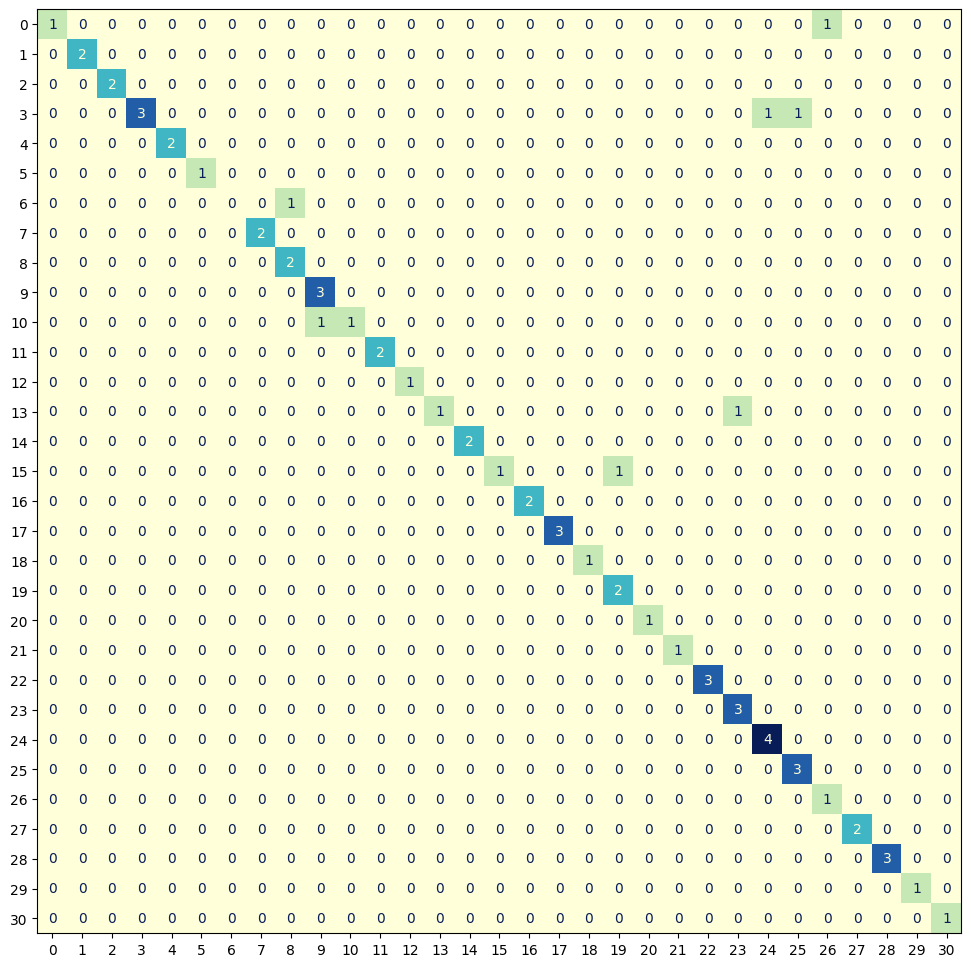

In [30]:
plt.figure(figsize= (20,5))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(1,39)))
fig, ax = plt.subplots(figsize=(12,12))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [34]:
from tensorflow.keras.preprocessing import image
img_path = 'p1.JPG'
img = image.load_img(img_path, target_size=(256,256))
img_array = image.img_to_array(img)
img_array = img_array.astype("float32") / 255.0 
img_array = tf.expand_dims(img_array, 0)

In [42]:
predictions = model.predict(img_array)
predictions_class = np.argmax(predictions, axis=1)
print(predictions_class) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[18]


In [36]:
from tensorflow.keras.models import load_model
model.save('model.h5')

In [61]:
import torch    
import torch.onnx
model = model()
model.eval()  # Set the model to evaluation mode

# Create a dummy input tensor
dummy_input = torch.randn(1, 3, 256, 256)  # Adjust dimensions as needed

# Export the model to ONNX format
torch.onnx.export(
    model, 
    dummy_input, 
    "model.onnx",  # Output file name
    export_params=True,  # Store the trained parameter weights inside the model file
    opset_version=11,  # ONNX version to export
    do_constant_folding=True,  # Whether to execute constant folding for optimization
    input_names=['input'],  # The model's input names
    output_names=['output'],  # The model's output names
    dynamic_axes={'input': {0: 'batch_size'},  # Variable length axes
                  'output': {0: 'batch_size'}}
)

OSError: [WinError 126] The specified module could not be found. Error loading "C:\Users\dsmat\AppData\Roaming\Python\Python311\site-packages\torch\lib\fbgemm.dll" or one of its dependencies.